0       0.370207
1      -0.482347
2       0.514836
3       0.383528
4       1.298881
5      -0.292045
6       0.339758
7       1.093354
8       0.492000
9      -0.834405
10     -0.904817
11      1.538661
12     -1.148404
13     -0.040846
14     -0.499474
15     -1.258779
16     -0.973326
17     -0.417644
18     -0.763994
19     -0.335814
20      1.637618
21     -0.775412
22      0.531963
23     -0.866757
24     -0.866757
25      0.160874
26     -1.171240
27      0.358788
28      0.160874
29     -1.894388
          ...   
1430    0.613793
1431   -1.060865
1432   -1.041835
1433    0.526254
1434   -0.741157
1435    0.040984
1436   -1.239749
1437    0.792677
1438   -0.531825
1439    0.398752
1440    1.978259
1441   -1.270197
1442    0.935404
1443   -1.072283
1444   -0.177863
1445   -1.146501
1446   -0.623170
1447    1.093354
1448   -0.322493
1449   -1.685056
1450    0.526254
1451    0.119008
1452   -0.843921
1453   -0.714515
1454   -0.560370
1455    0.250316
1456    1.061003
1457    1.5691

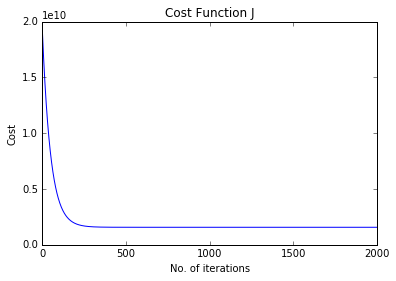

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('./data/houseprice_train.csv')

#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['GrLivArea']
y = data['SalePrice']

#normalize
x = (x - x.mean()) / x.std()
print(x)
#np.c_ is another way of doing array concatenate
#convert a single dimensional array to array of array [[x1,x2,x3],[x1,x2,x3],[x1,x2,x3]]
x = np.c_[np.ones(x.shape[0]), x] 
print(x)

#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()
